# IT304S: Contratação de Energia para Grandes Consumidores.
##Prof. Dr. Luiz Carlos Pereira da Silva

# Definição de ciência de dados 

A ciência de dados pode ser definida como um conjunto de técnicas de analise de dados para obter e apresentar informações úteis para um usuario. 

# Metodologia

Uma metodologia muito utilizado para analisar dados é o chamado ``CRISP-DM", por suas siglas em inglês: Cross-Industry Standard Process for Data Mining. O CRISP-DM tem seis etapas que são:

* **Business Understanding:** Definição dos objetivos, declaração do problema, * * pergunta de interesse.
* **Data Understanding:** Utilização de nosso conhecimento para coletar os dados.
* **Data Preparation:** Manipulação de dados para a eliminação de outliers e dados faltantes.
* **Modeling:** Modelo ou abordagem utilizado para estudar o comportamento de nosso sistema a partir de nossos dados.
* **Evaluation:** Avaliação dos resultados obtidos, no contexto se são de ajuda para responder nossa pergunta de interesse.
* **Deployment:** Disponibilizar o análise de dados.

# Business Understanding

* **Definição dos objetivos:** O objetivo do presente notebook é apresentar as variaveis disponíveis no banco de dados UFFS.xlsx.
* **Declaração do problema:** O arquivo UFFS.xlsx, contém as informações disponíveis das planilhas elétricas da UFFS, precisamos de fazer um analize exploratorio dos dados para conhecer os dados disponíveis da UFFS.
* **Perguntas de Interesse:**
Há dados faltantes?

# Data Understanding:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/juliobento9131/IT304S_Trabalho_Parte_2.git

fatal: destination path 'IT304S_Trabalho_Parte_2' already exists and is not an empty directory.


In [ ]:
import pandas as pd

In [ ]:
abas_de_excel =  pd.ExcelFile("/content/drive/Shareddrives/IT304S - Comercialização de Energia Elétrica para Grandes Clientes/Projeto/Planilhas - Universidades/Grupo 15 - UFFS/Preencher_universidade.xlsx")
abas_de_excel.sheet_names

['Apresentação', 'UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6']

In [ ]:
UC2 = abas_de_excel.parse("UC2")
UC2.shape

(81, 30)

In [ ]:
UC2.head()

DATA   ANO  MÊS  ...  ACRESCIMO_BAMAR  ACRESCIMO_BVERM1  ACRESCIMO_BVERM2
0  -set-2013  2013    9  ...              0.0               0.0                 0
1  -out-2013  2013   10  ...              0.0               0.0                 0
2  -nov-2013  2013   11  ...              0.0               0.0                 0
3  -dez-2013  2013   12  ...              0.0               0.0                 0
4  -jan-2014  2014    1  ...              0.0               0.0                 0

[5 rows x 30 columns]

# Data Preparation:

In [ ]:
import numpy as np

In [ ]:
np.nan + np.nan

nan

In [ ]:
np.nan == np.nan

False

In [ ]:
np.isnan(np.nan)

True

In [ ]:
data = []
for colm in UC2.columns[3:]:
  data.append([colm, UC2.shape[0]-UC2[colm].apply(np.isnan).sum(), UC2[colm].apply(np.isnan).sum(), (UC2[colm].apply(np.isnan).sum()/81)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

Variavel  ...  Percentagem de Dados Faltantes
0   DEMANDA_CONTRATADA_P  ...                         100.00%
1       DEMANDA_ISENTA_P  ...                         100.00%
2      DEMANDA_ISENTA_FP  ...                         100.00%
3          TAR_TUSD_KW_P  ...                         100.00%
4   DEMANDA_REGISTRADA_P  ...                          76.54%
5  DEMANDA_REGISTRADA_FP  ...                           4.94%

[6 rows x 4 columns]

## Visualização de Dados Faltantes

In [ ]:
import missingno as msno

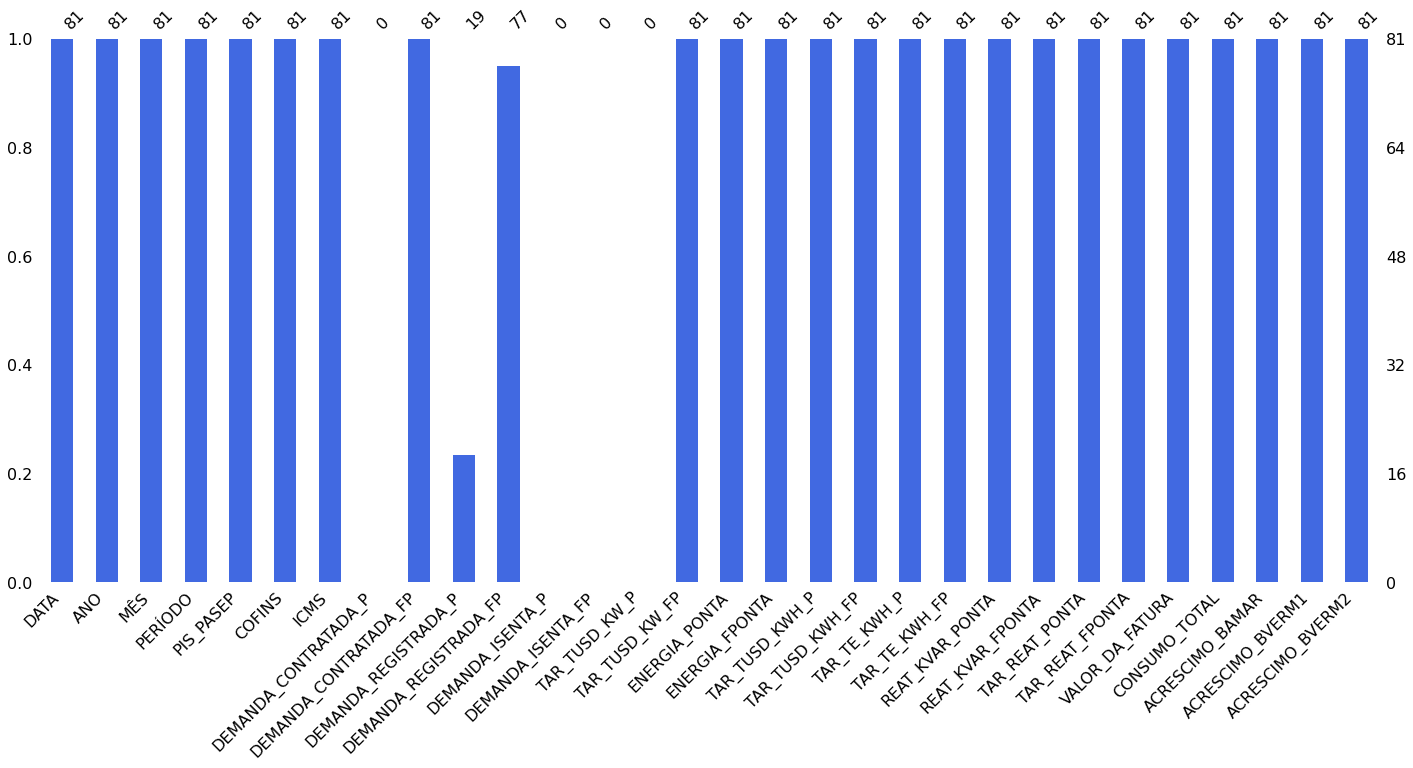

In [ ]:
msno.bar(UC2, color="RoyalBlue") #para visualizar a integridade do datafram

## Matriz de Dados Faltantes

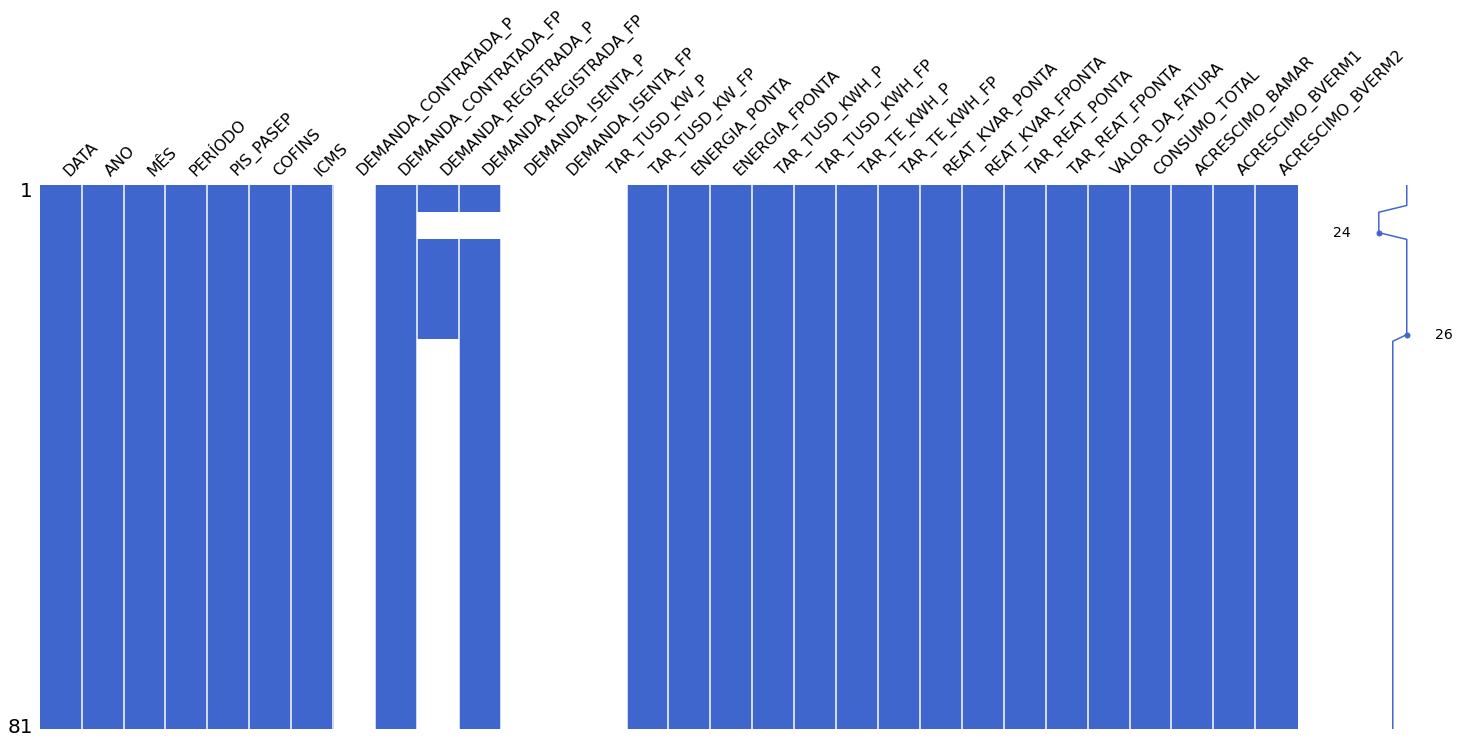

In [ ]:
msno.matrix(UC2, color = (0.25,0.4,0.8))

## Matriz de Correlação de Dados Faltantes

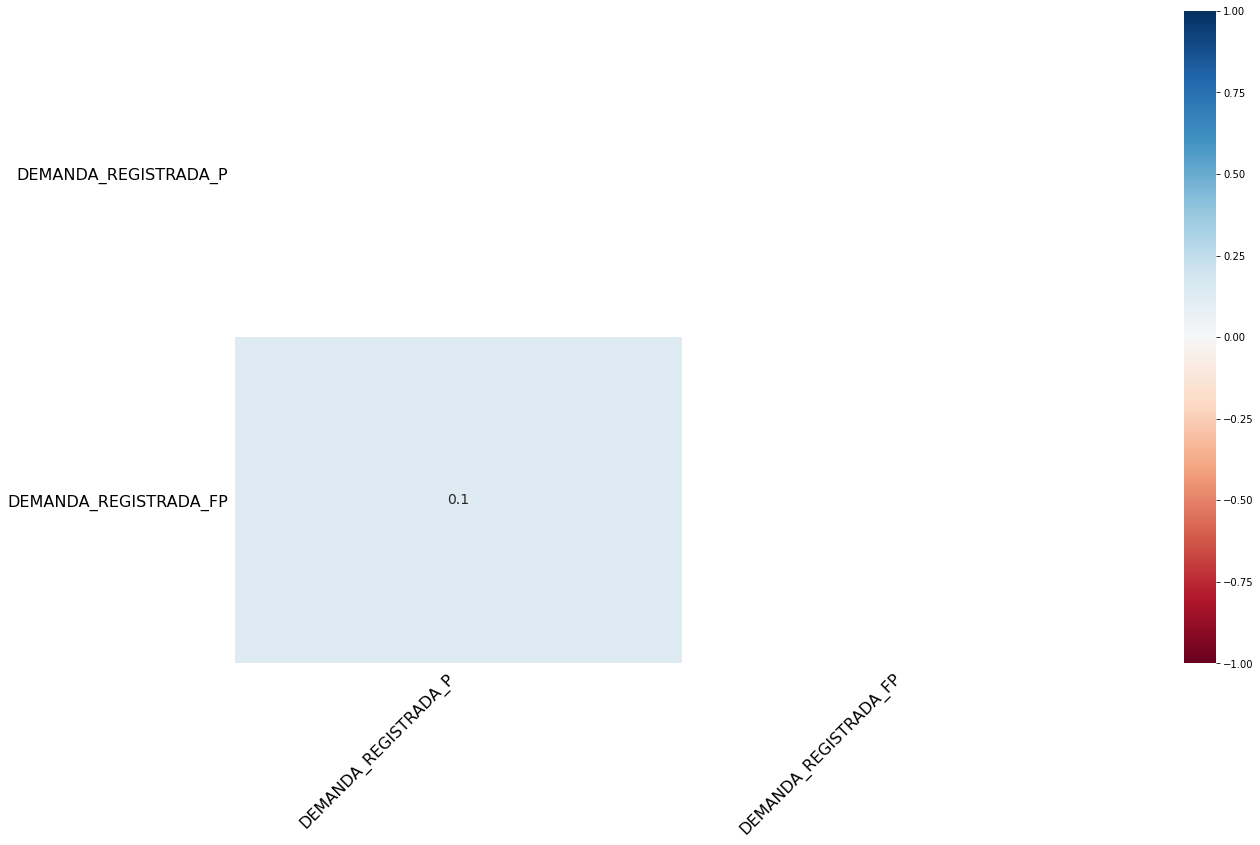

In [ ]:
msno.heatmap(UC2)

### Dendogram de dados Faltantes

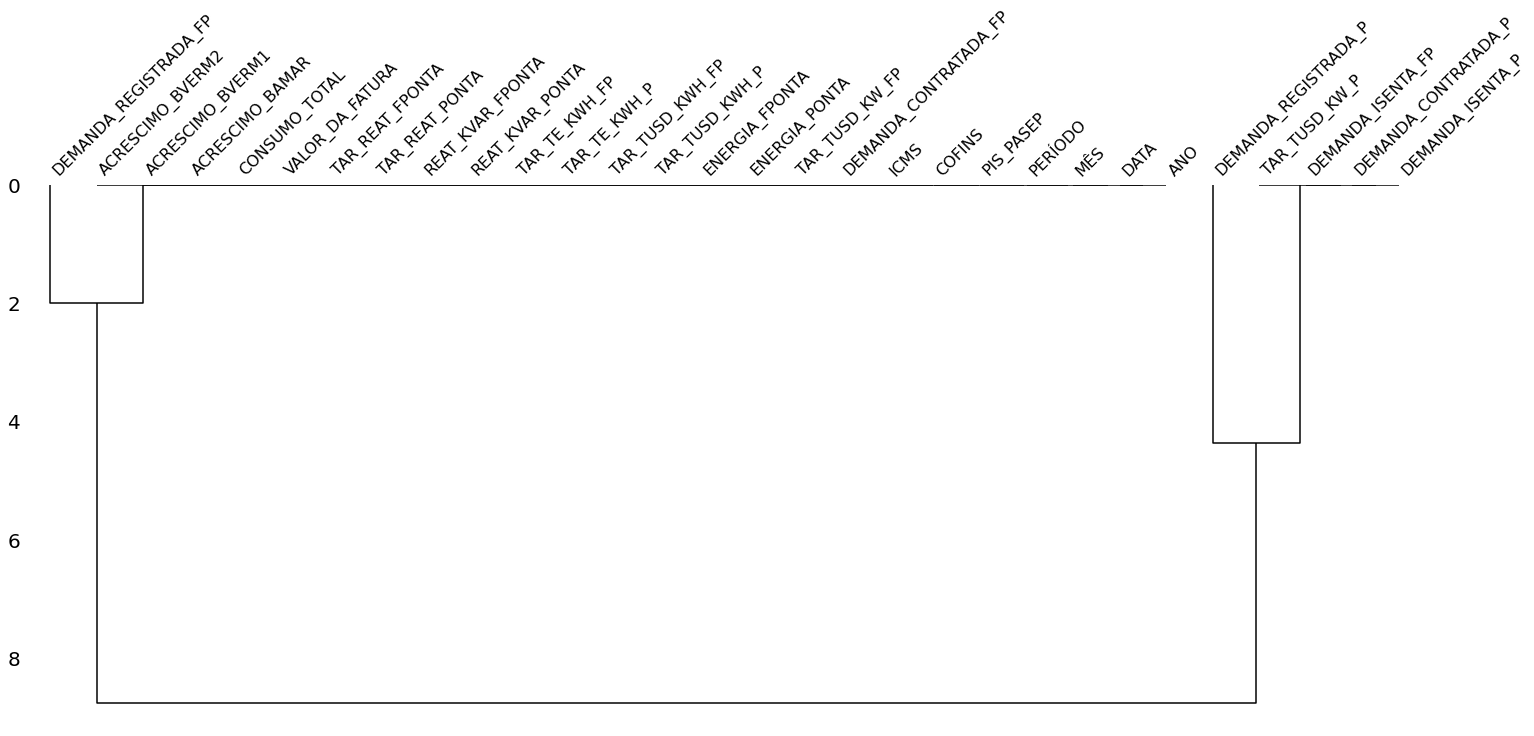

In [ ]:
msno.dendrogram(UC2)

## Eliminação de colunas com excesso de dados Faltantes

In [ ]:
UC2_df = UC2.drop(set(UC2.columns[UC2.isnull().mean() >0.5]), 1)
UC2_df.shape

(81, 25)

## Visualização de Variaveis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

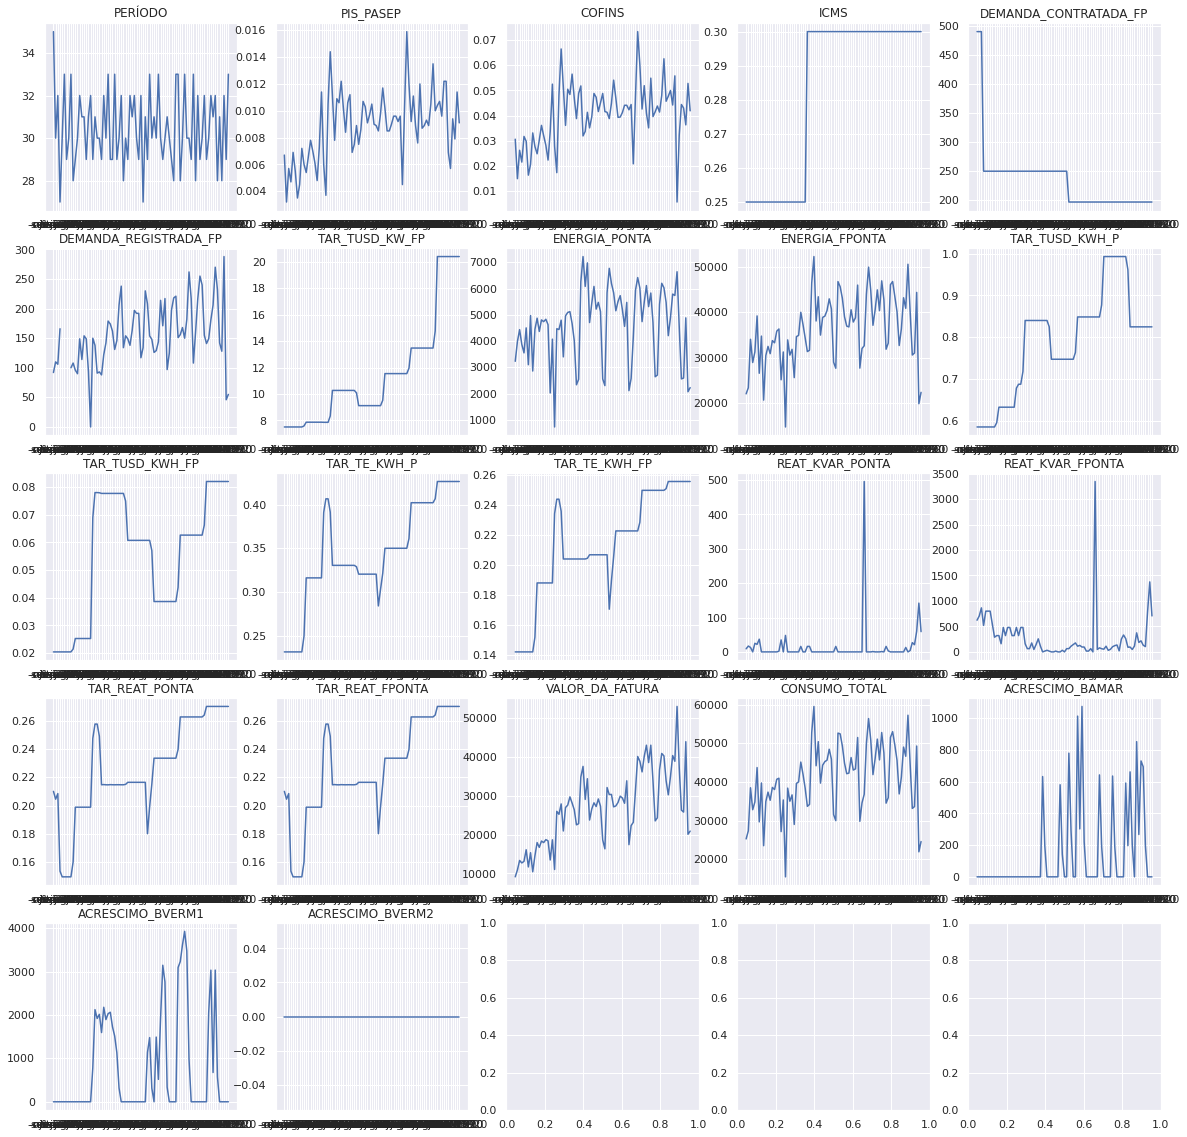

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC2_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC2_df.DATA, UC2_df[col])

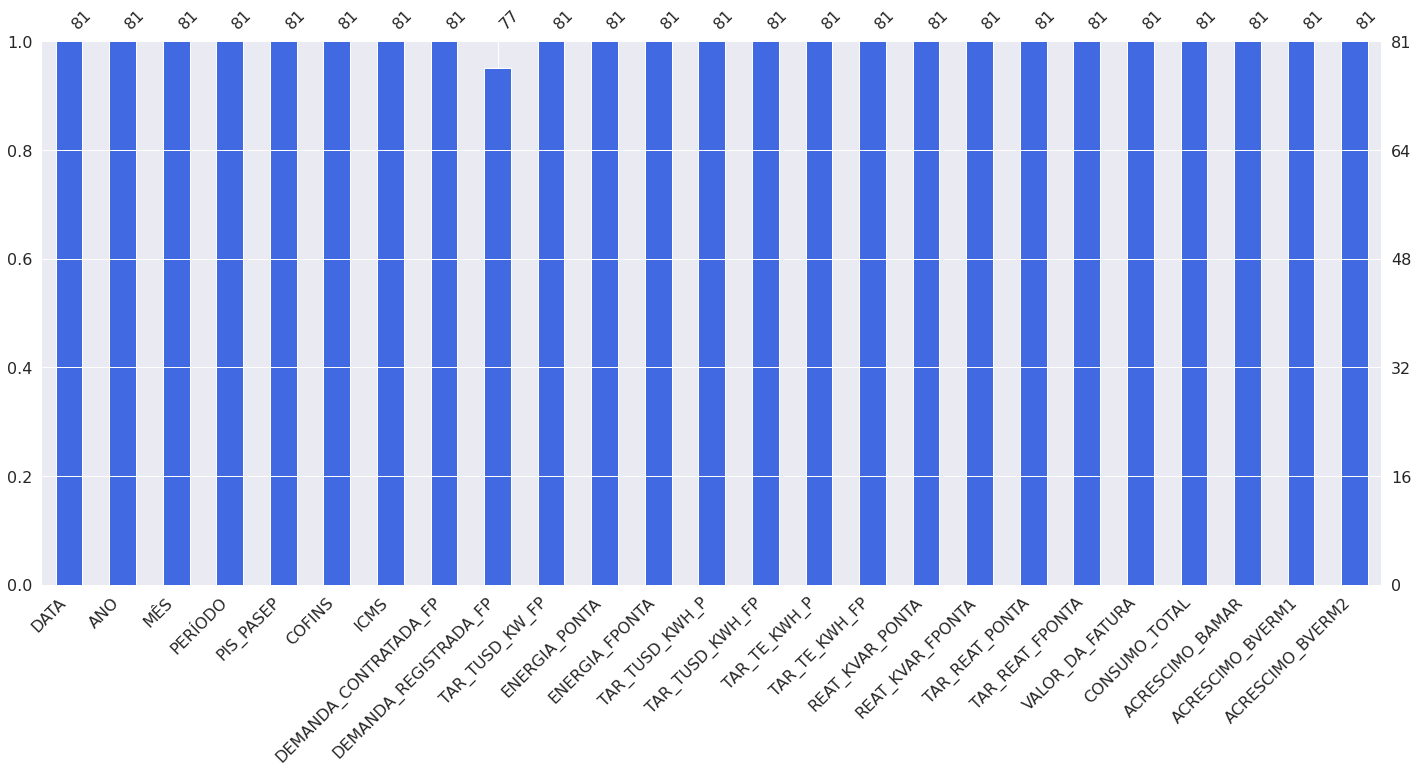

In [ ]:
msno.bar(UC2_df, color="RoyalBlue")

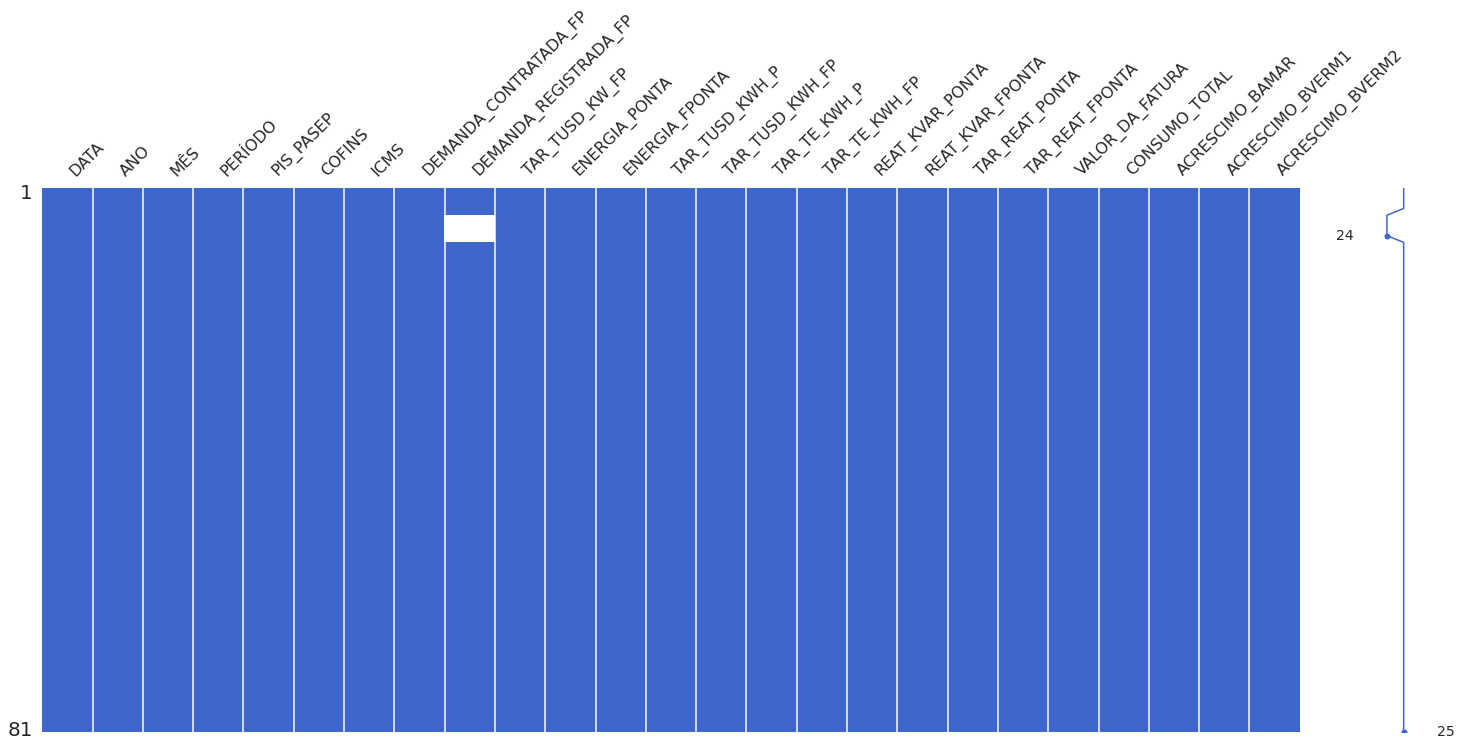

In [ ]:
msno.matrix(UC2_df, color = (0.25,0.4,0.8))

## Tratamento dos dados

Tratamento das colunas com dados faltantes da UC2

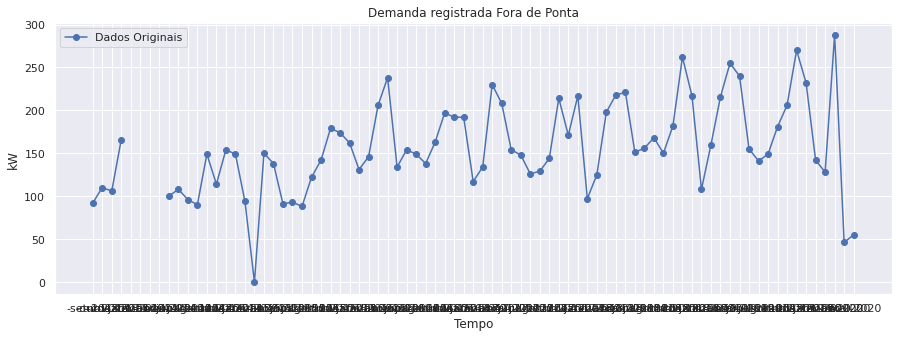

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC2_df.DATA, UC2_df.DEMANDA_REGISTRADA_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kW")
_ = plt.legend(['Dados Originais'])
_ = plt.title("Demanda registrada Fora de Ponta")
plt.show()

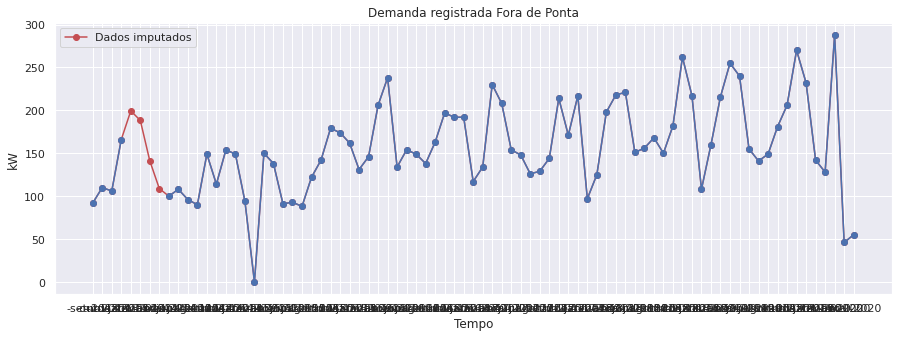

In [ ]:
UC2_quadratica = UC2_df.copy(deep= True)
UC2_quadratica['DEMANDA_REGISTRADA_FP'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC2_quadratica.DATA, UC2_quadratica.DEMANDA_REGISTRADA_FP, marker='o', color="r")
_ = plt.plot(UC2_df.DATA, UC2_df.DEMANDA_REGISTRADA_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kW")
_ = plt.legend(['Dados imputados'])
_ = plt.title("Demanda registrada Fora de Ponta")
plt.show()

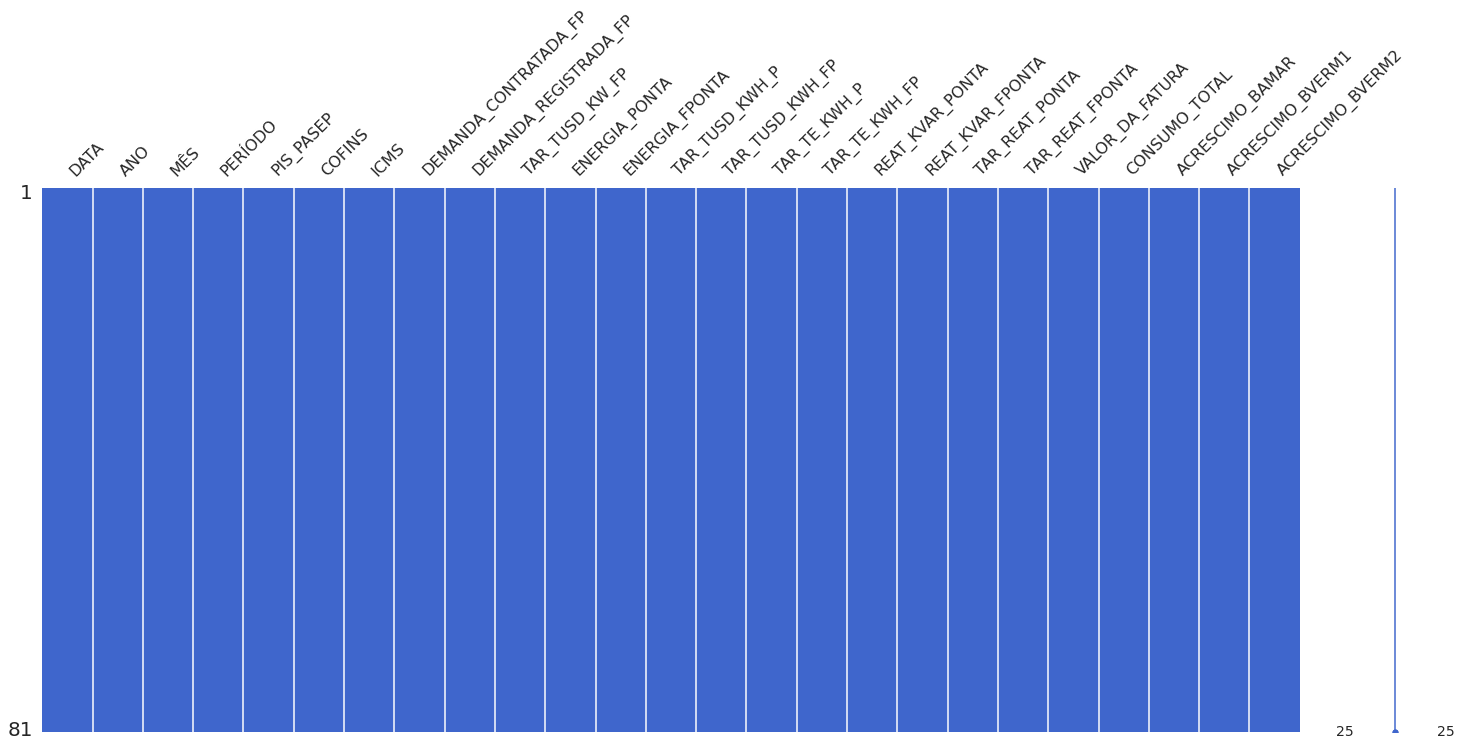

In [ ]:
UC2_df = UC2_quadratica 
msno.matrix(UC2_df, color = (0.25,0.4,0.8))

## Outliers
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Matriz de correlação 

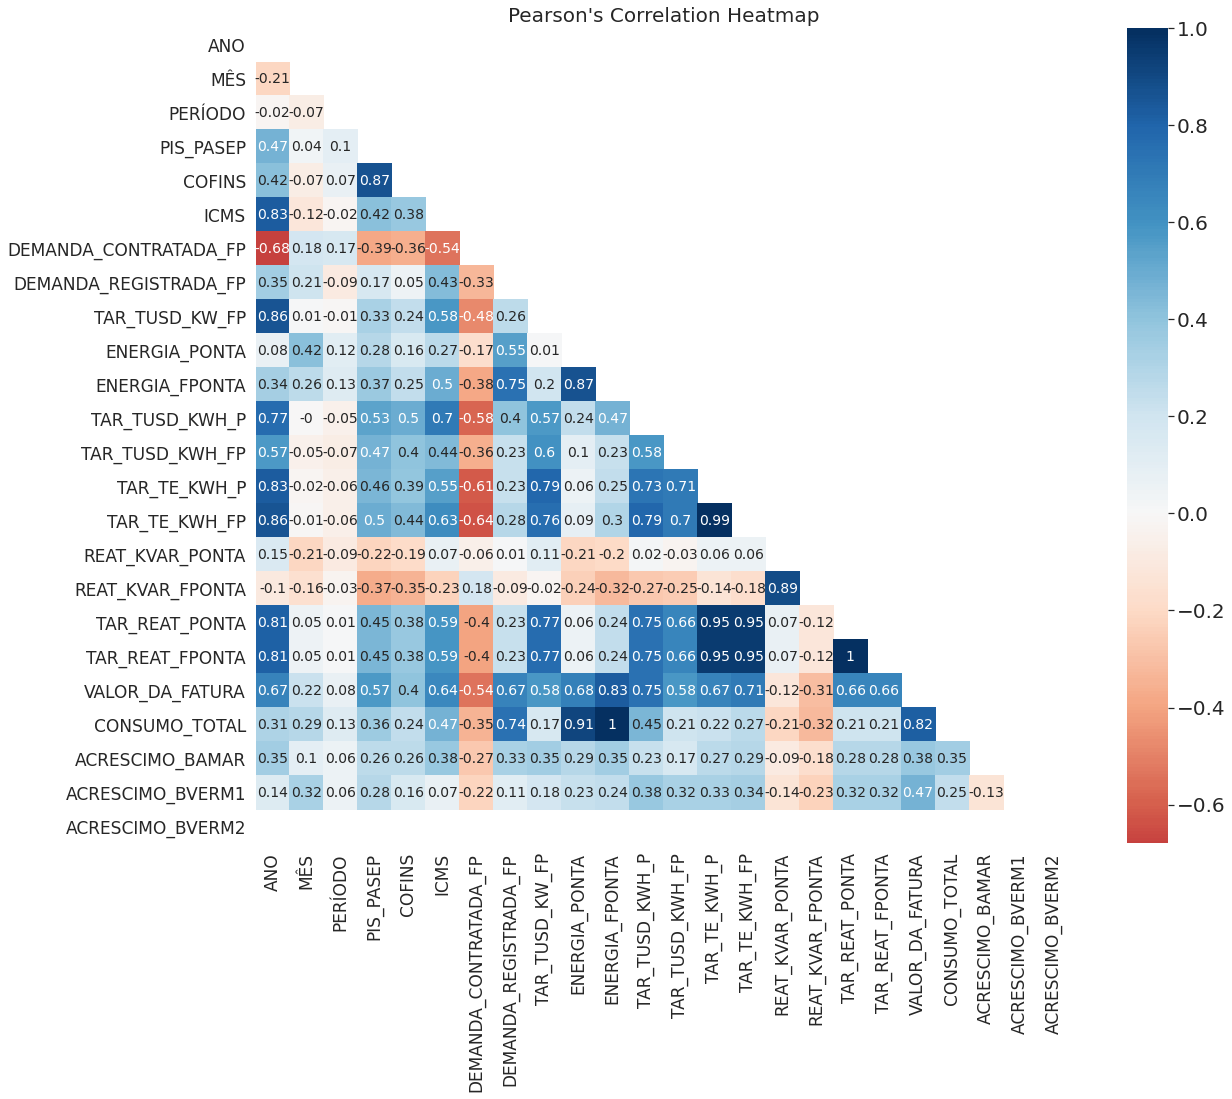

In [ ]:
cor = UC2_df
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

In [ ]:
corr = UC2_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


### Método Z score
https://en.wikipedia.org/wiki/Standard_score#/media/File:The_Normal_Distribution.svg

In [ ]:
def z_score (data, treshold =4):
  outliers = []
  treshold = treshold
  mean, std = np.mean(data), np.std(data)
  for i in data:
    zscore = (i-mean)/std
    if np.abs(zscore) > treshold:
      outliers.append(i)
  
  return outliers

Avaliação de Outliers da UC2

In [ ]:
outliers = z_score(UC2_df[["PERÍODO"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["PIS_PASEP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["COFINS"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["DEMANDA_REGISTRADA_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["TAR_TUSD_KW_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["ENERGIA_PONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["ENERGIA_FPONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["TAR_TUSD_KWH_P"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["TAR_TUSD_KWH_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["TAR_TE_KWH_P"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["TAR_TE_KWH_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["REAT_KVAR_PONTA"]].values, 4)
outliers

[array([496])]

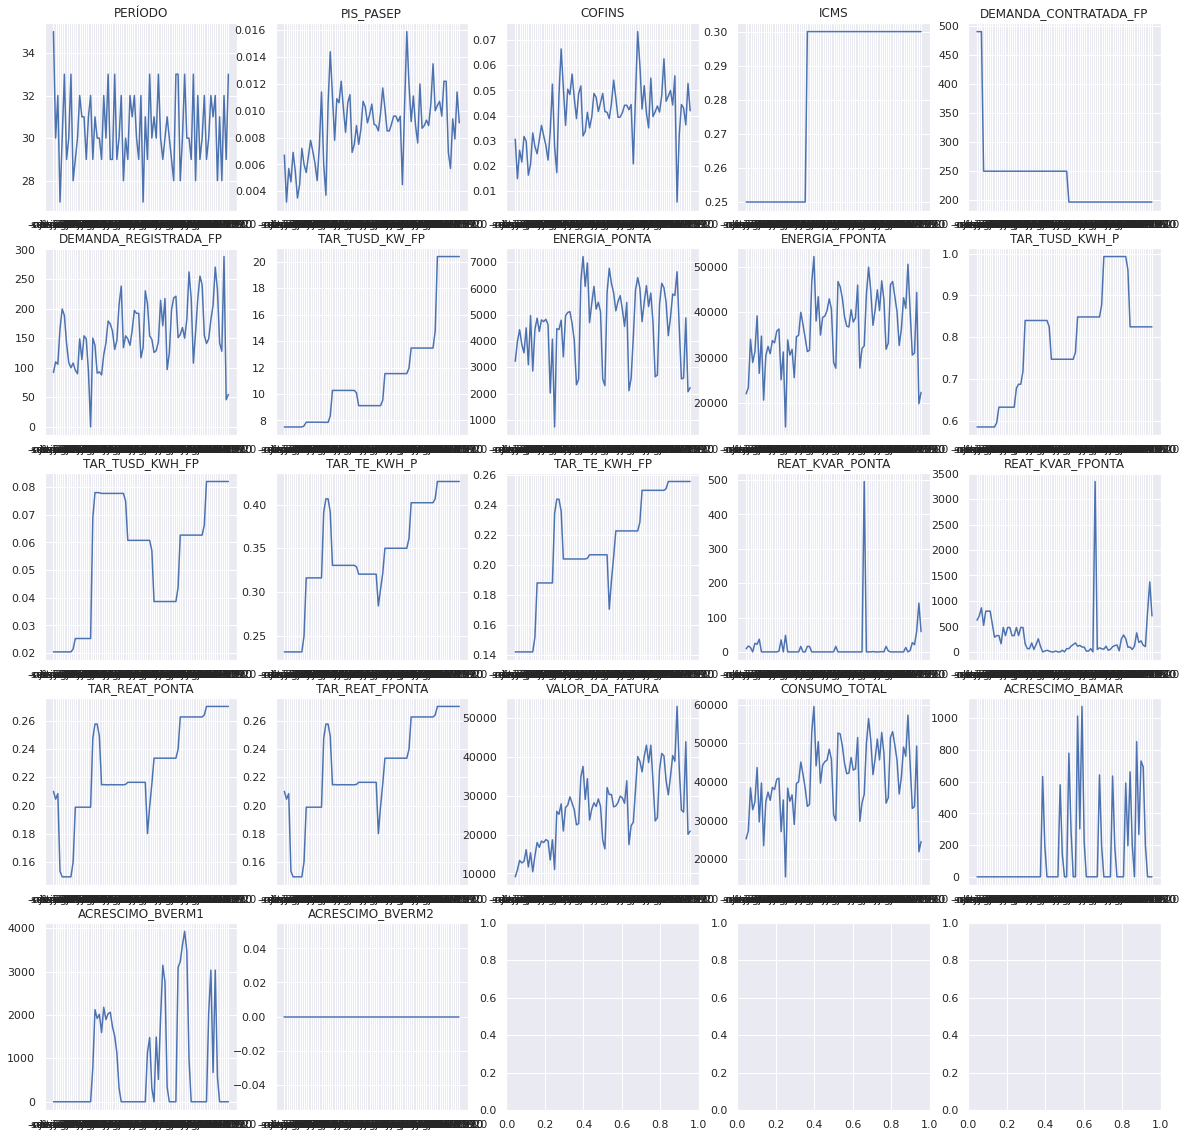

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC2_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC2_df.DATA, UC2_df[col])

In [ ]:
print(len(outliers)/len(UC2_df[["REAT_KVAR_PONTA"]].values)*100, "%")

1.2345679012345678 %


In [ ]:
index_value = UC2_df[["REAT_KVAR_PONTA"]][UC2_df[["REAT_KVAR_PONTA"]].eq(496).any(1)].index.tolist()[0]
UC2_df.at[index_value, 'REAT_KVAR_PONTA'] = UC2_df.REAT_KVAR_PONTA.mode()

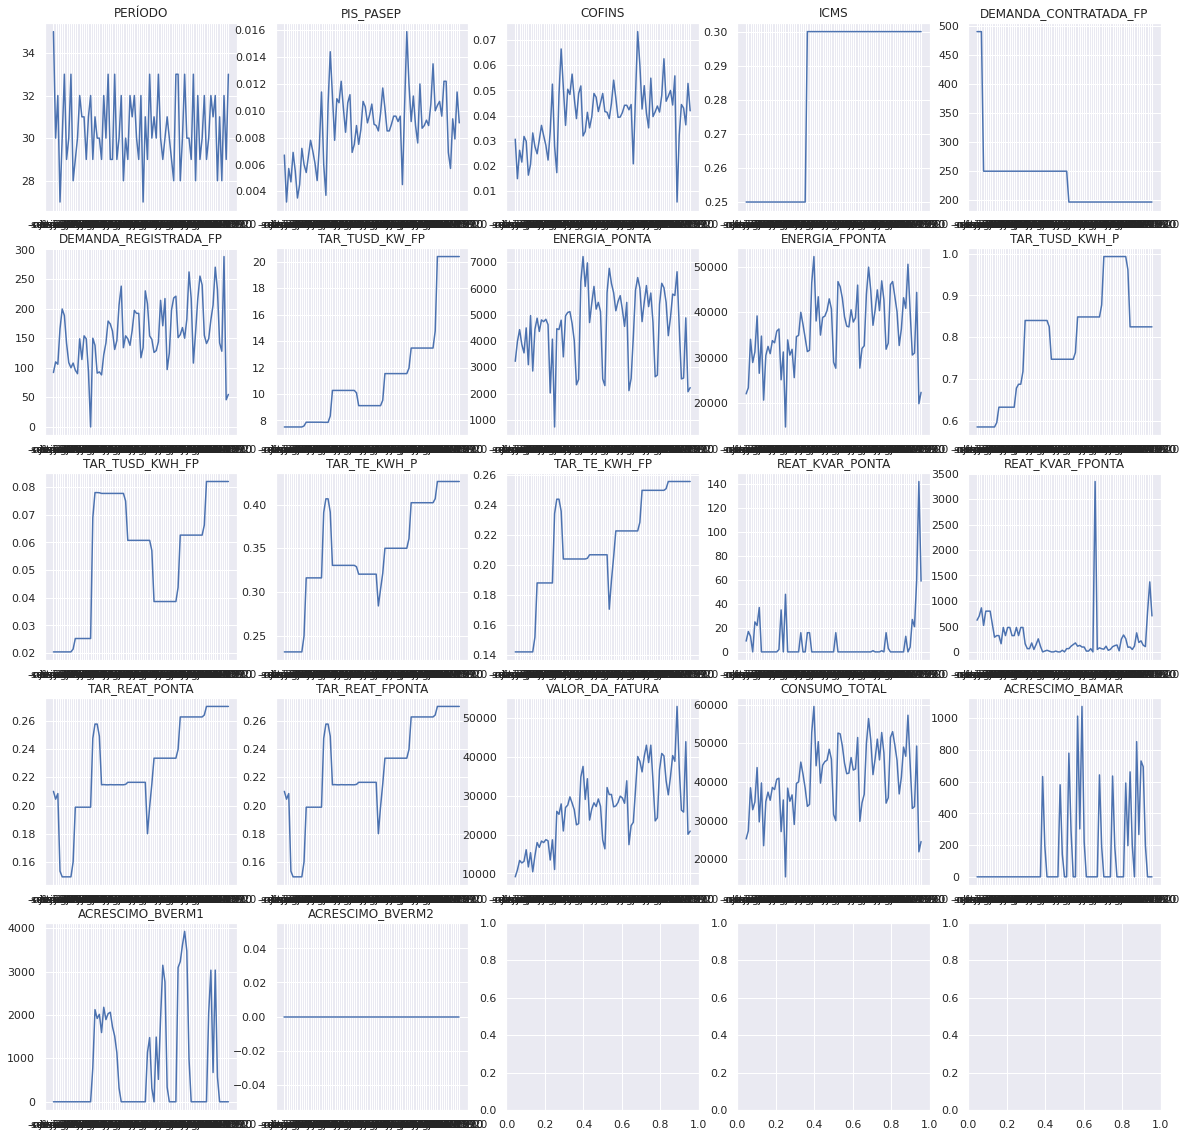

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC2_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC2_df.DATA, UC2_df[col])

In [ ]:
outliers = z_score(UC2_df[["REAT_KVAR_FPONTA"]].values, 4)
outliers

[array([3344])]

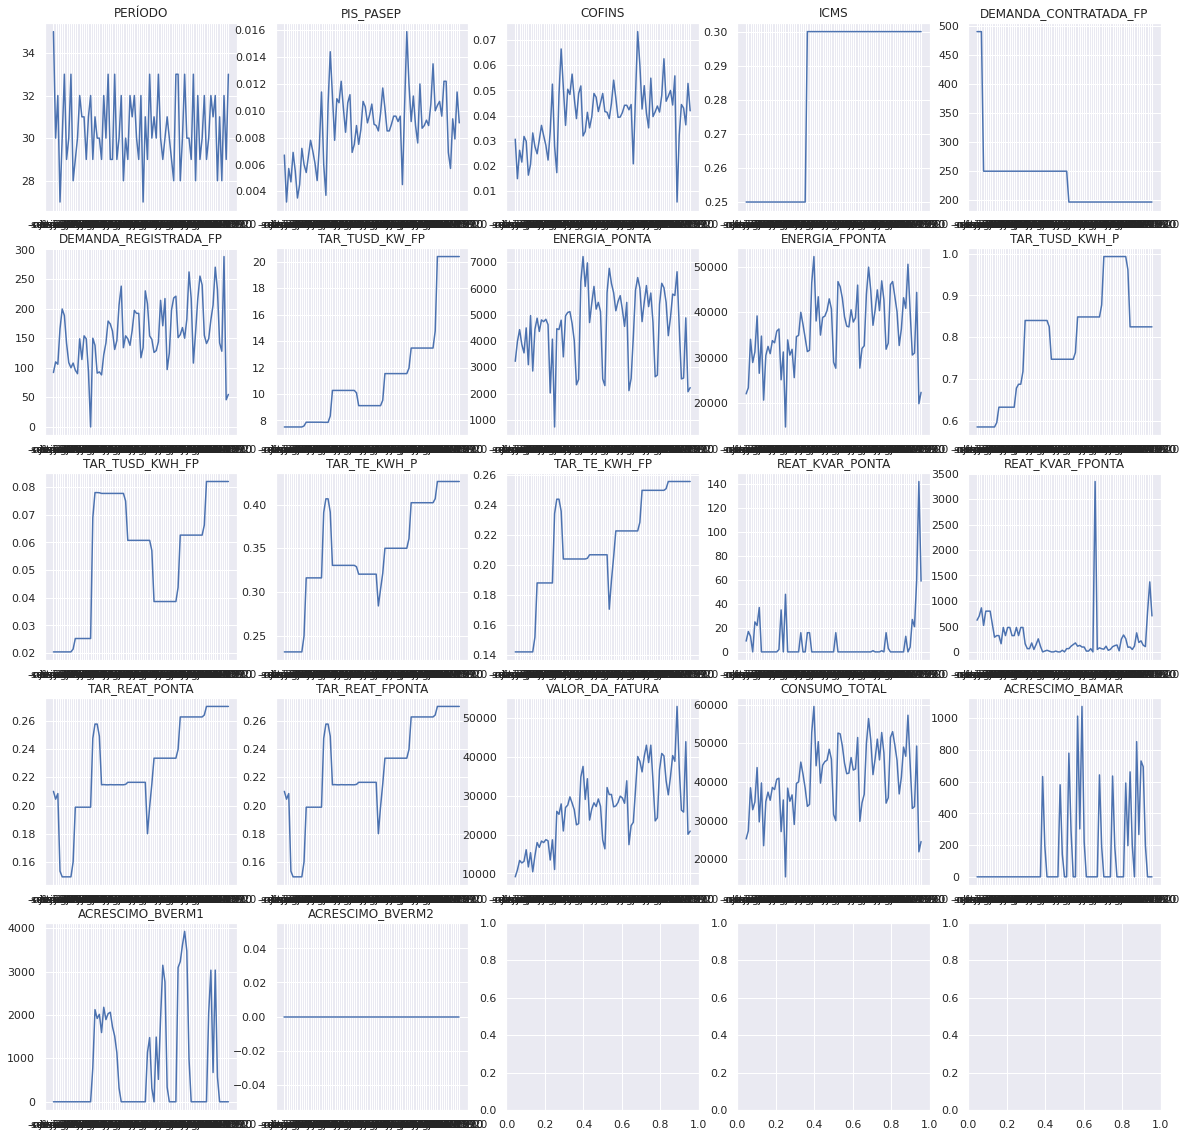

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC2_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC2_df.DATA, UC2_df[col])

In [ ]:
print(len(outliers)/len(UC2_df[["REAT_KVAR_FPONTA"]].values)*100, "%")

1.2345679012345678 %


In [ ]:
index_value = UC2_df[["REAT_KVAR_FPONTA"]][UC2_df[["REAT_KVAR_FPONTA"]].eq(3344).any(1)].index.tolist()[0]
UC2_df.at[index_value, 'REAT_KVAR_FPONTA'] = UC2_df.REAT_KVAR_FPONTA.mode()

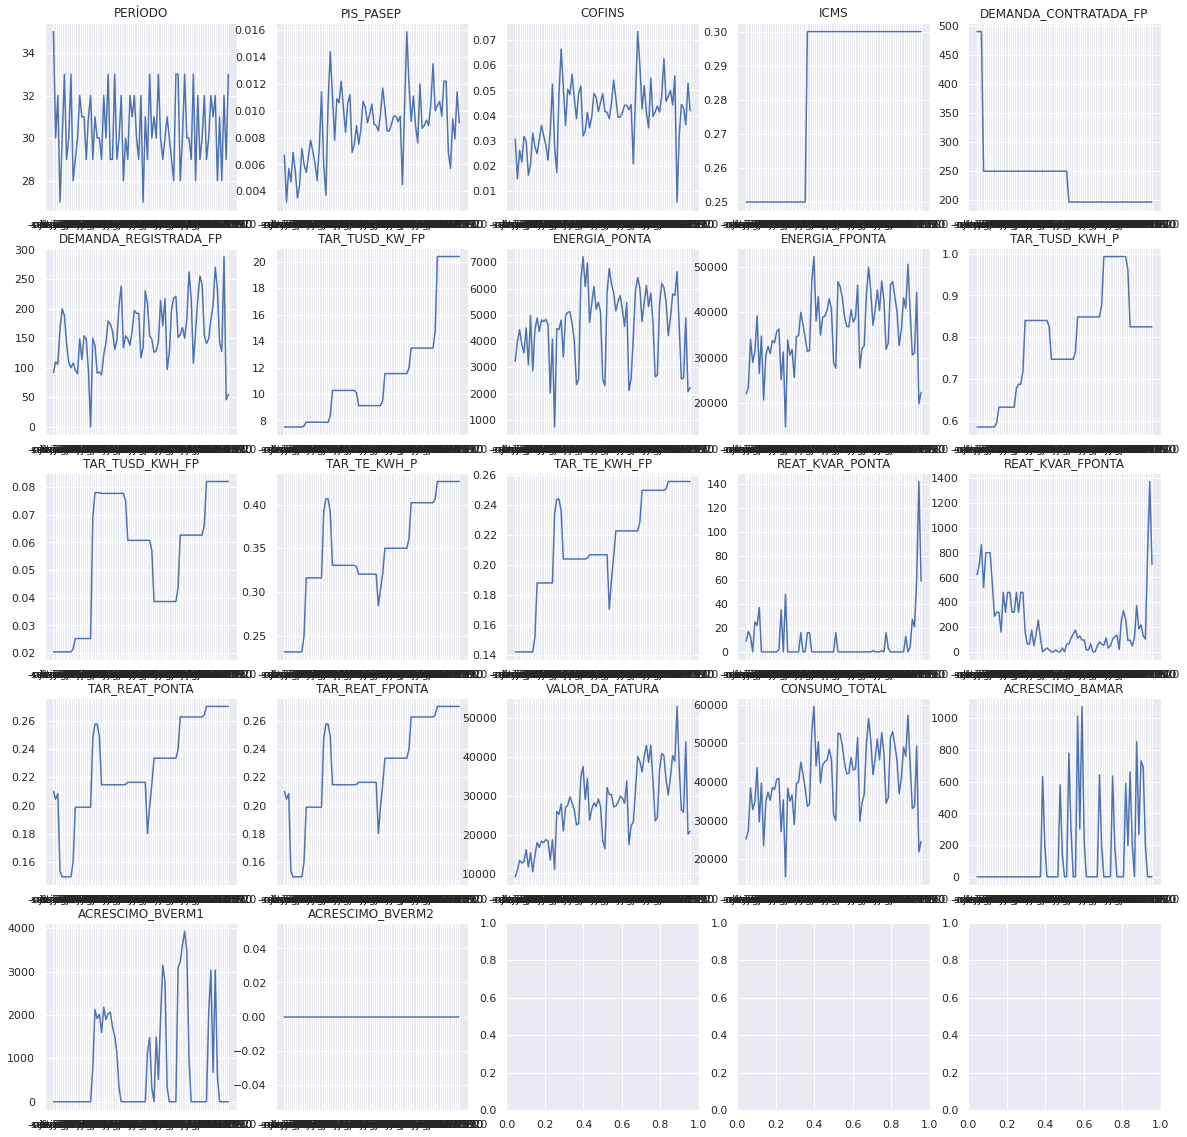

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC2_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC2_df.DATA, UC2_df[col])

In [ ]:
outliers = z_score(UC2_df[["TAR_REAT_PONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["TAR_REAT_FPONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["VALOR_DA_FATURA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["CONSUMO_TOTAL"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["ACRESCIMO_BAMAR"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC2_df[["ACRESCIMO_BVERM1"]].values, 4)
outliers

[]

## Matriz de Correlação de Dados sem outlier

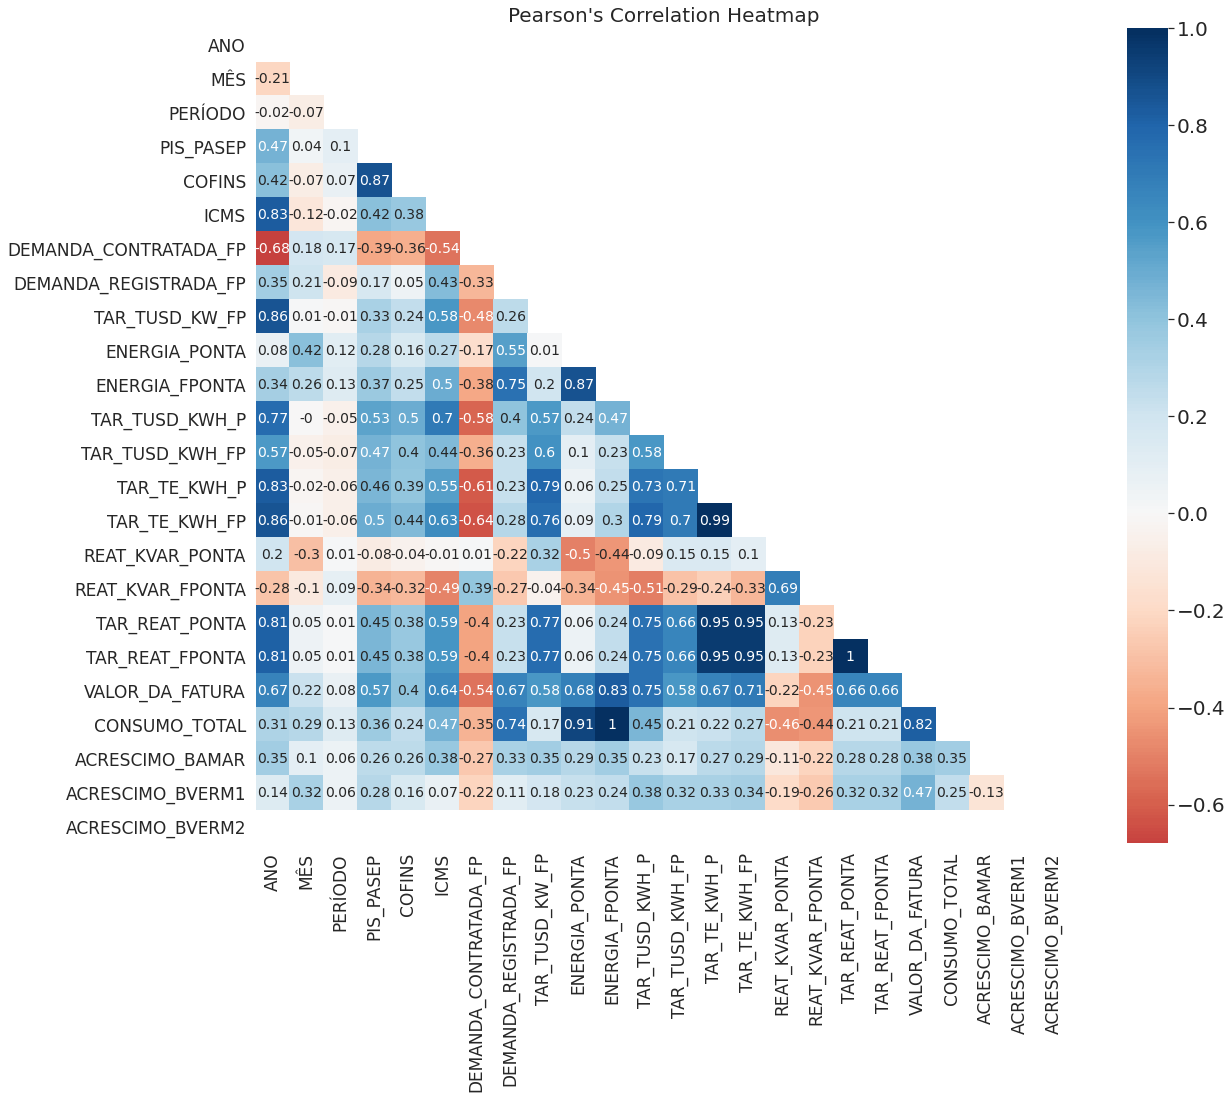

In [ ]:
cor = UC2_df
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

## Exemplo de Diagrama de Dispersão de Variaveis não Correlacionadas e Correlacionadas

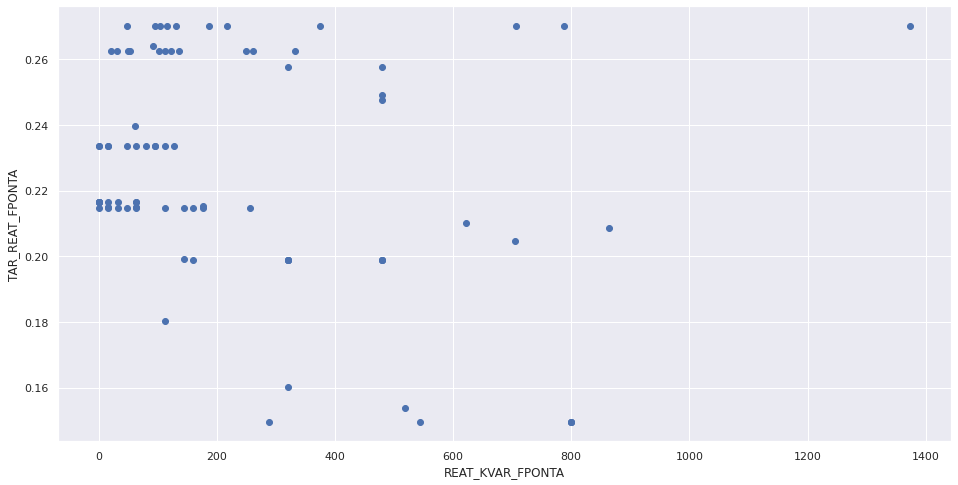

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC2_df["REAT_KVAR_FPONTA"], UC2_df["TAR_REAT_FPONTA"])
ax.set_xlabel('REAT_KVAR_FPONTA')
ax.set_ylabel('TAR_REAT_FPONTA')
plt.show()

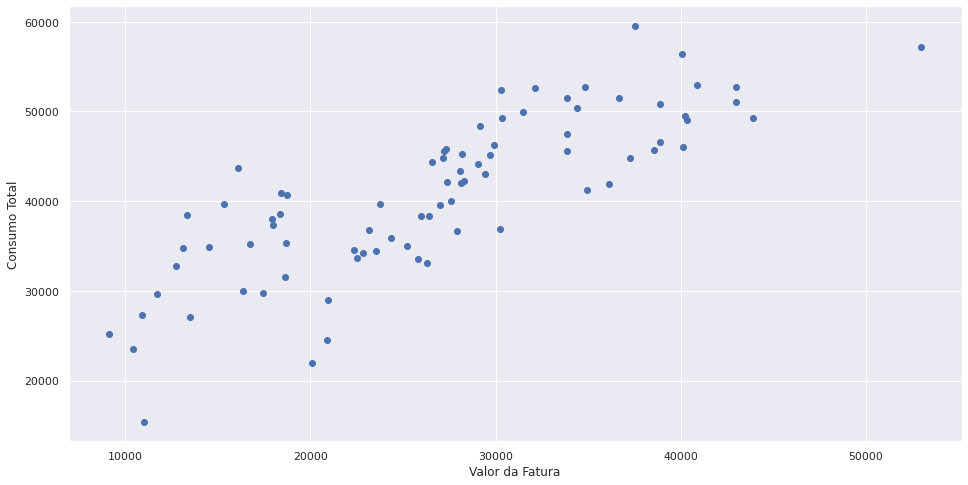

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC2_df["VALOR_DA_FATURA"], UC2_df["CONSUMO_TOTAL"])
ax.set_xlabel('Valor da Fatura')
ax.set_ylabel('Consumo Total')
plt.show()

# Exportação para csv

In [ ]:
#import glob
#from google.colab import files

In [ ]:
#UC2_df.to_csv('uc2.csv')
#files.download('uc2.csv')

# Modeling

In [ ]:
df_train = UC2_df["CONSUMO_TOTAL"].iloc[:69]
df_test = UC2_df["CONSUMO_TOTAL"].iloc[69:]

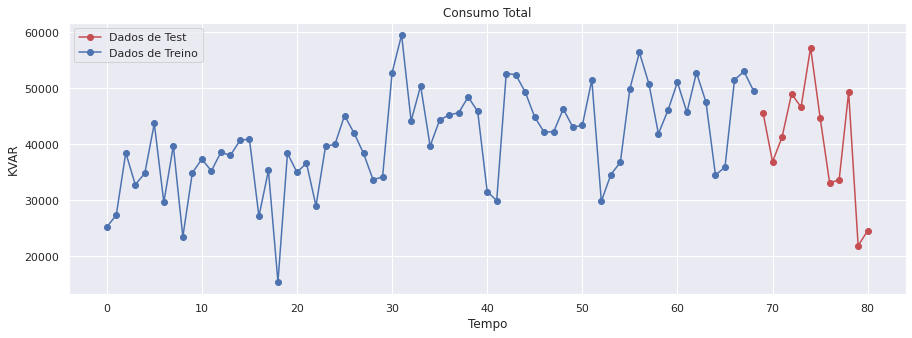

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [ ]:
! pip install pmdarima

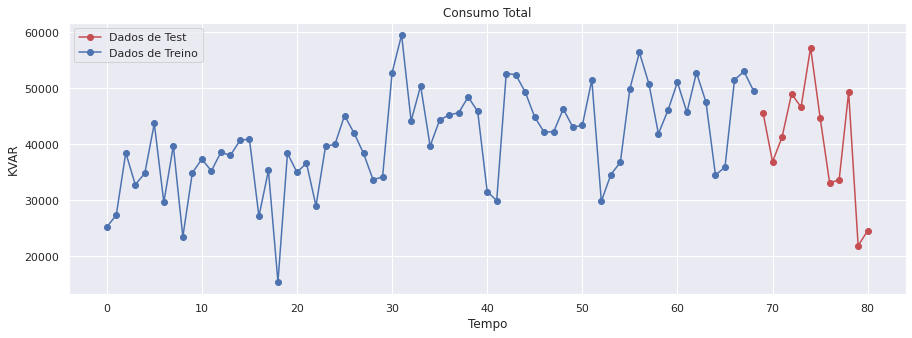

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [ ]:
from pmdarima.arima import ADFTest

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
adf_test = ADFTest(alpha=0.05)

In [ ]:
adf_test.should_diff(df_train)

(0.07754146943179081, True)

In [ ]:
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1191.980, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1177.171, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1169.594, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1182.919, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1171.504, Time=0.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1171.435, Time=0.47 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1174.595, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1172.252, Time=0.73 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1178.614, Time=0.11 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1171.557, Time=0.32 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1170.679, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1172.304, Time=0.16 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1172.481, Time=0.71 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1170.611, Time=0.24 sec

Best model:  ARIMA

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   69
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -581.797
Date:                            Sun, 17 Jan 2021   AIC                           1169.594
Time:                                    23:38:22   BIC                           1175.670
Sample:                                         0   HQIC                          1171.950
                                             - 69                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4864      0.130     -3.733      0.000      -0.742      -0.231
ma.S.L12      -0.5503      0.122     -4.513      0.000      -0.789      -0.311
sigma2       7.47e+07   7.38e-10   1.01e+17      0.000    7.47e+07    7.47e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                43.43
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             1.45
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.48e+31. Standard errors may be unstable.
"""

In [ ]:
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes.columns = ['predicoes']

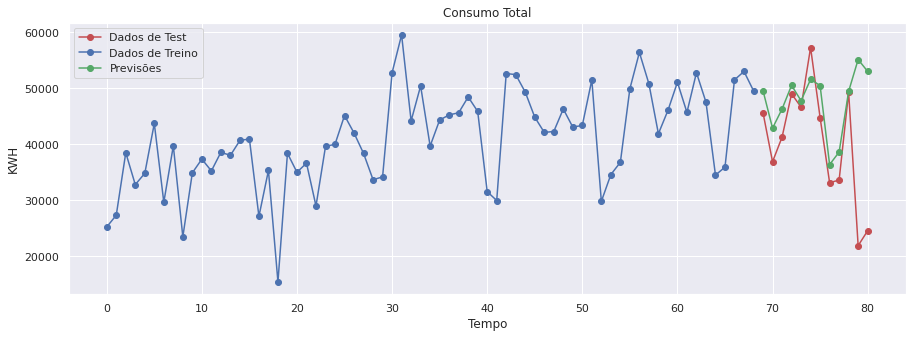

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

# Avaliação

$R M S E=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{y}_{i}-y_{i}\right)^{2}}{n}}$

In [ ]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

In [ ]:
np.mean(RMSE(df_test.values, predicoes.values))

11727.409663396451

# Resultado Banco de dados com imputações

In [ ]:
UC2_df.describe()

ANO        MÊS  ...  ACRESCIMO_BVERM1  ACRESCIMO_BVERM2
count    81.000000  81.000000  ...         81.000000              81.0
mean   2016.543210   6.481481  ...        766.539877               0.0
std       2.000309   3.532390  ...       1137.525038               0.0
min    2013.000000   1.000000  ...          0.000000               0.0
25%    2015.000000   3.000000  ...          0.000000               0.0
50%    2017.000000   6.000000  ...          0.000000               0.0
75%    2018.000000  10.000000  ...       1515.610000               0.0
max    2020.000000  12.000000  ...       3926.460000               0.0

[8 rows x 24 columns]

In [ ]:
UC2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATA                   81 non-null     object 
 1   ANO                    81 non-null     int64  
 2   MÊS                    81 non-null     int64  
 3   PERÍODO                81 non-null     int64  
 4   PIS_PASEP              81 non-null     float64
 5   COFINS                 81 non-null     float64
 6   ICMS                   81 non-null     float64
 7   DEMANDA_CONTRATADA_FP  81 non-null     int64  
 8   DEMANDA_REGISTRADA_FP  81 non-null     float64
 9   TAR_TUSD_KW_FP         81 non-null     float64
 10  ENERGIA_PONTA          81 non-null     int64  
 11  ENERGIA_FPONTA         81 non-null     int64  
 12  TAR_TUSD_KWH_P         81 non-null     float64
 13  TAR_TUSD_KWH_FP        81 non-null     float64
 14  TAR_TE_KWH_P           81 non-null     float64
 15  TAR_TE_K

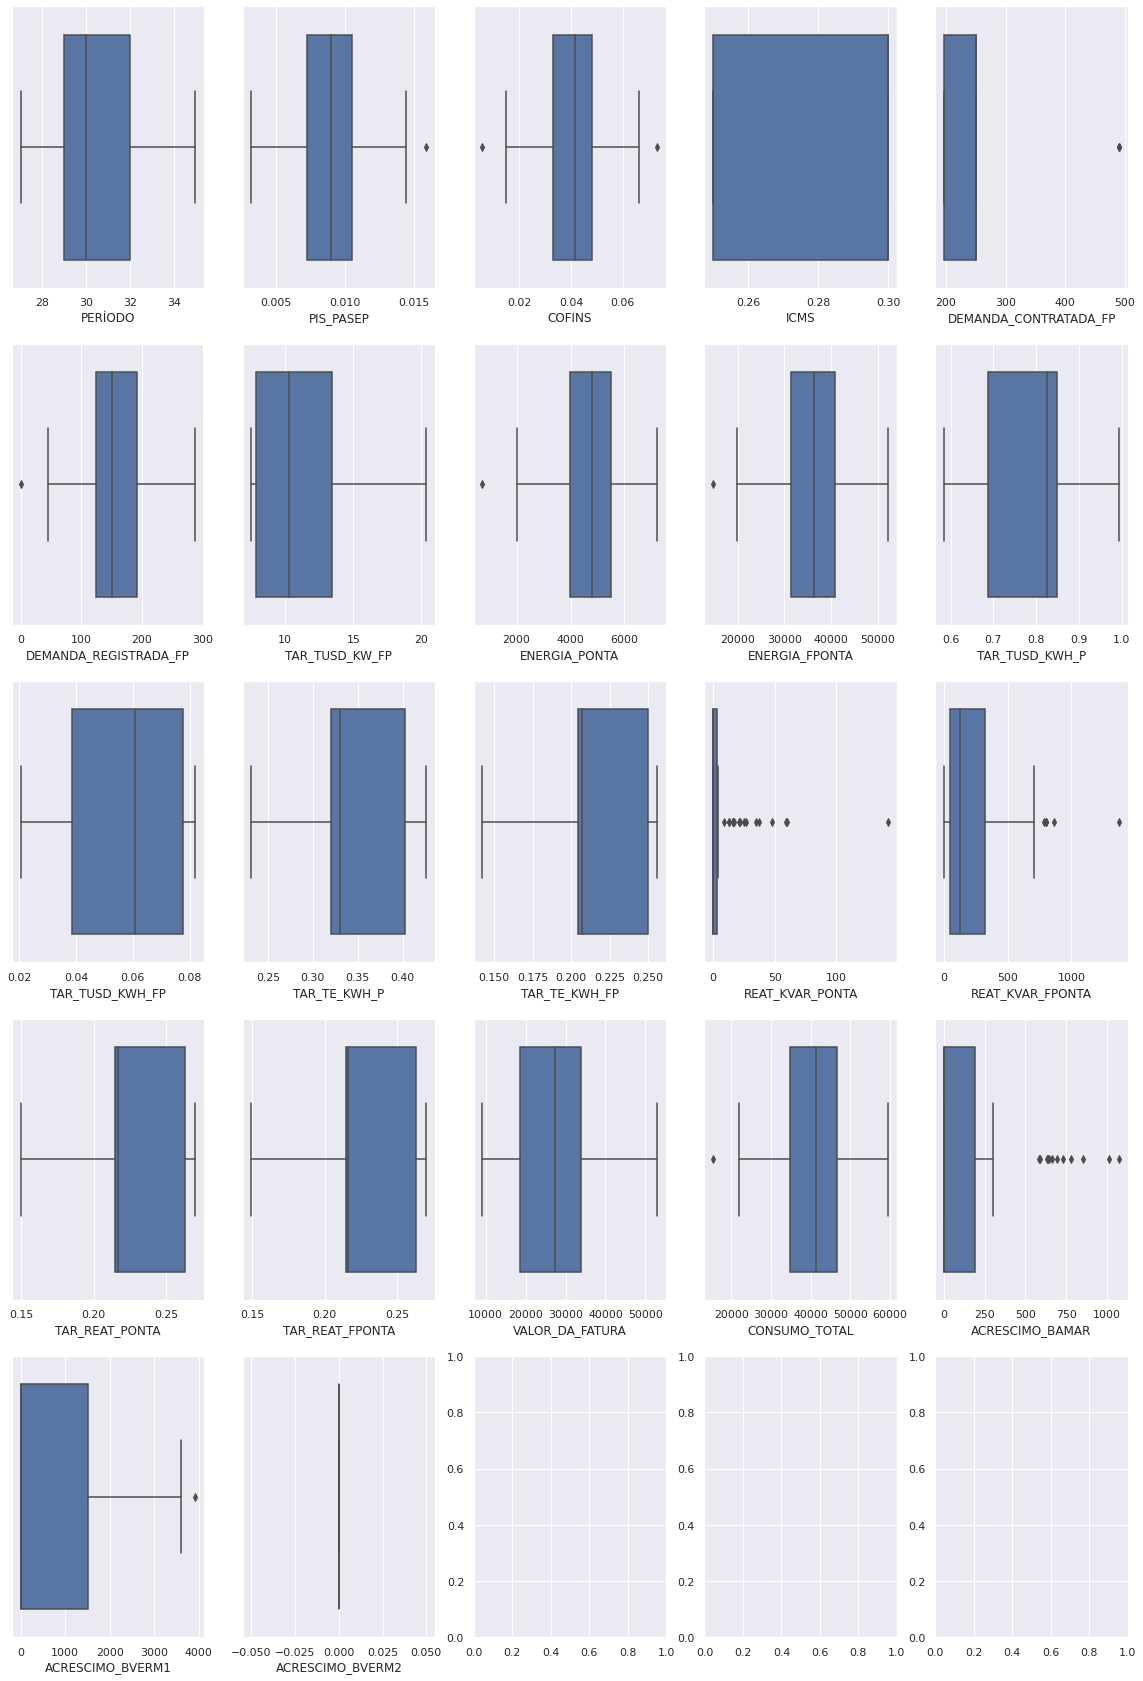

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,30))
for i,col in enumerate(UC2_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  sns.boxplot(x=UC2_df[col])

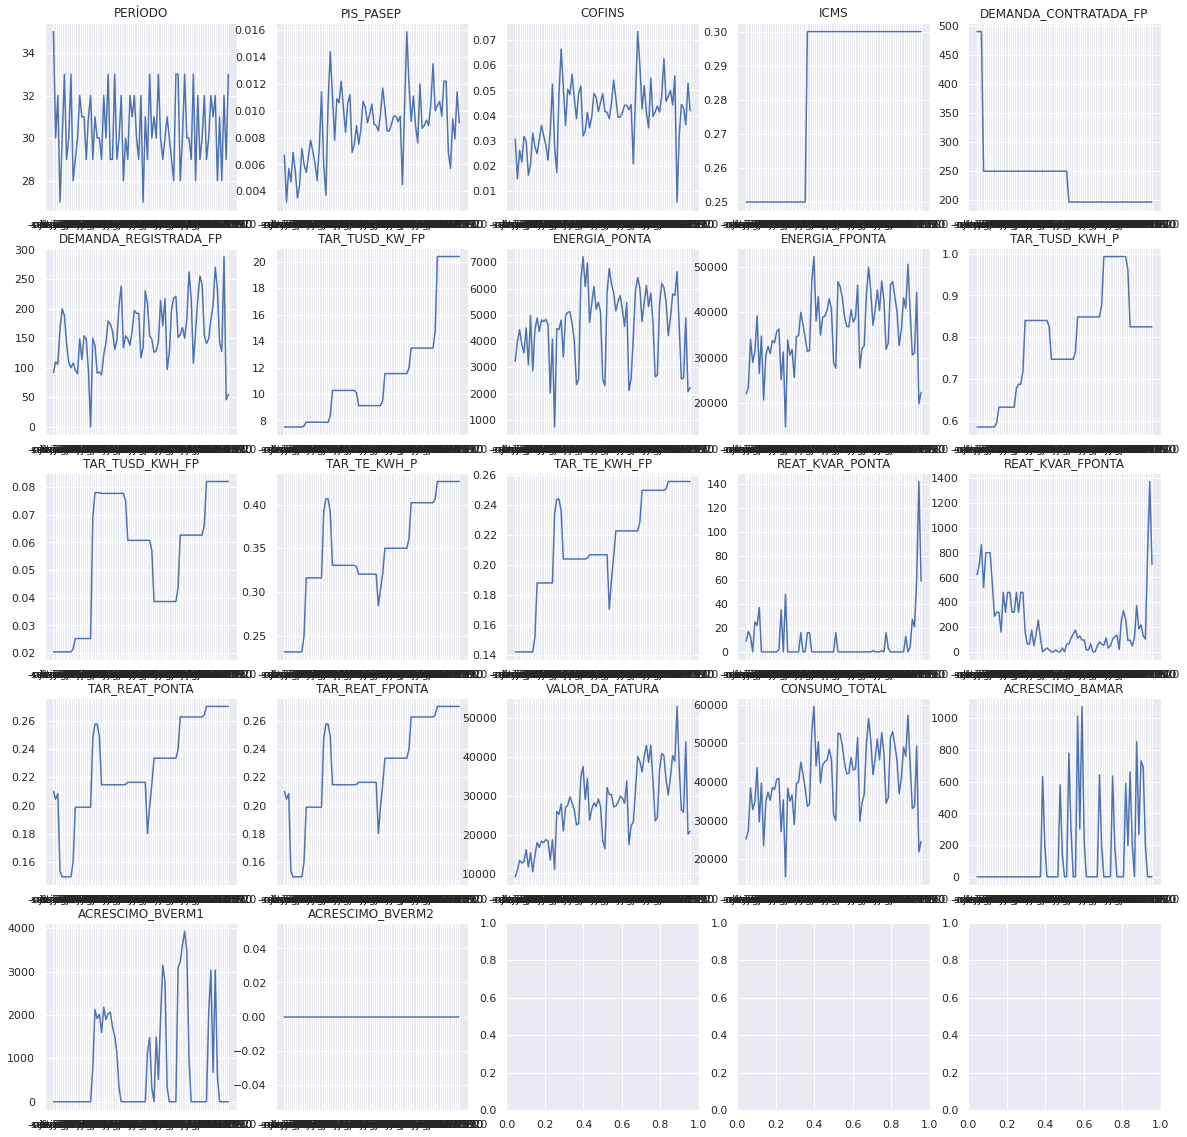

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC2_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC2_df.DATA, UC2_df[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


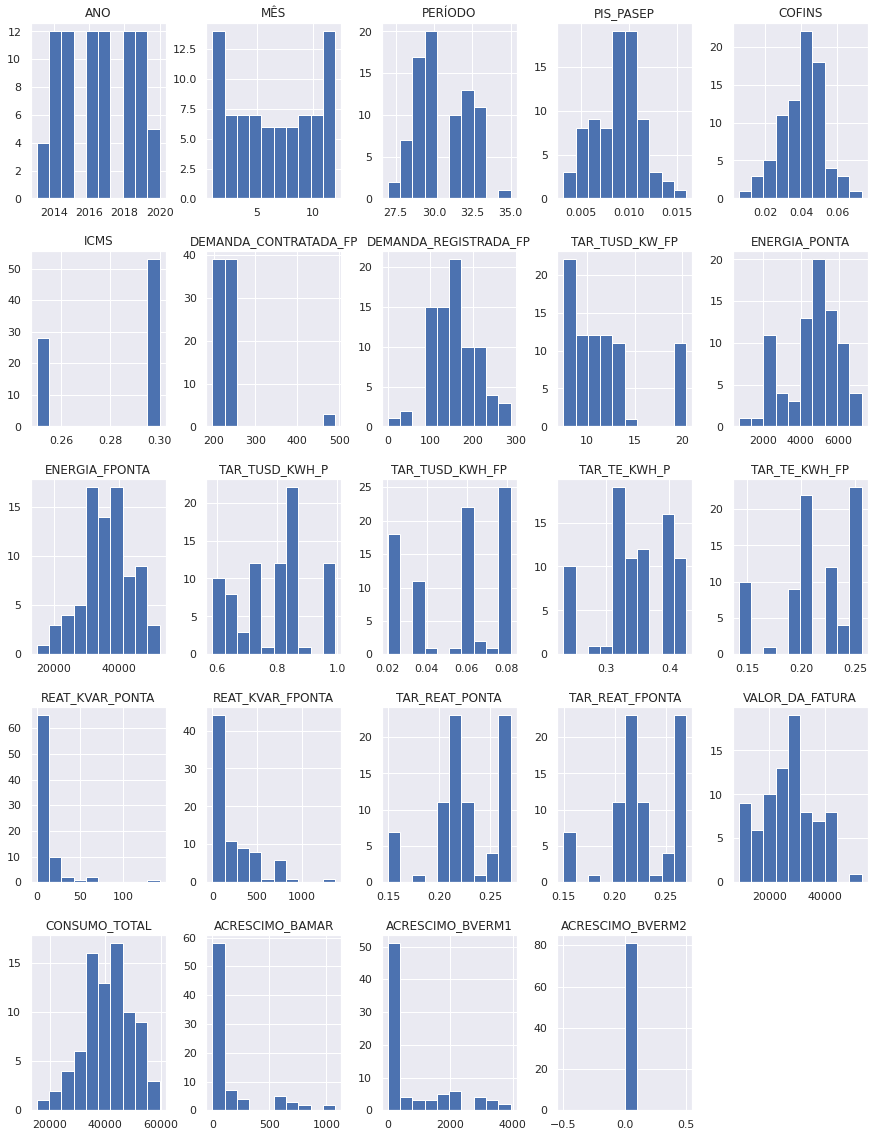

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
UC2_df.hist(ax = ax);

In [ ]:
UC2_df.to_csv(r'UC2.csv', index = False)

In [ ]:
#sns.pairplot(UC2_df[3:], palette='bwr')